In [1]:
print("Hello World")

Hello World


# L1 & L2 Regularization techniques

### Gradient Descent in Linear Regression:
In linear regression, the model targets to get the best-fit regression line to predict the value of y based on the given input value (x). While training the model, the model calculates the cost function which measures the Root Mean Squared error between the predicted value (pred) and true value (y). The model targets to minimize the cost function. 
To minimize the cost function, the model needs to have the best value of θ1 and θ2. Initially model selects θ1 and θ2 values randomly and then iteratively update these value in order to minimize the cost function until it reaches the minimum. By the time model achieves the minimum cost function, it will have the best θ1 and θ2 values. Using these finally updated values of θ1 and θ2 in the hypothesis equation of linear equation, the model predicts the value of x in the best manner it can. 

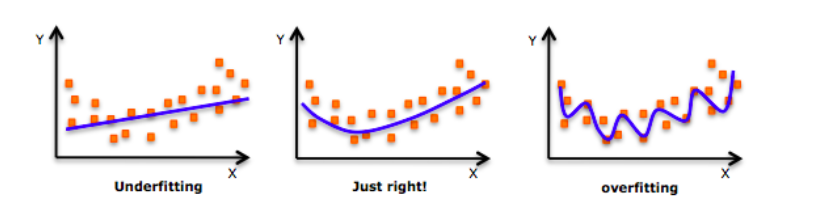

#### What is overfitting?
Overfitting happens when our model is only suitable to perform well on the seen/ trained data and it fails to perform well on unseen data. Overfitting occurs when our machine learning model tries to cover all the data points or more than the required data points present in the given dataset. Because of this, the model starts caching noise and inaccurate values present in the dataset, and all these factors reduce the efficiency and accuracy of the model. The overfitted model has low bias and high variance.<br><br>
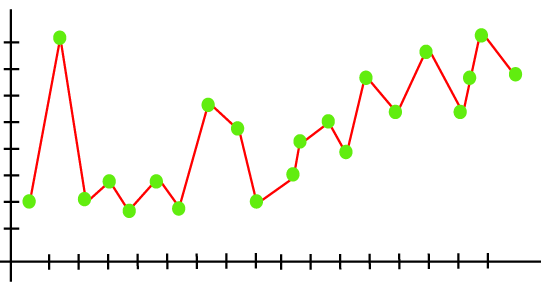

<br><br>.
#### What is underfitting?
Underfitting occurs when our machine learning model is not able to capture the underlying trend of the data. To avoid the overfitting in the model, the fed of training data can be stopped at an early stage, due to which the model may not learn enough from the training data. As a result, it may fail to find the best fit of the dominant trend in the data. In the case of underfitting, the model is not able to learn enough from the training data, and hence it reduces the accuracy and produces unreliable predictions.An underfitted model has high bias and low variance.
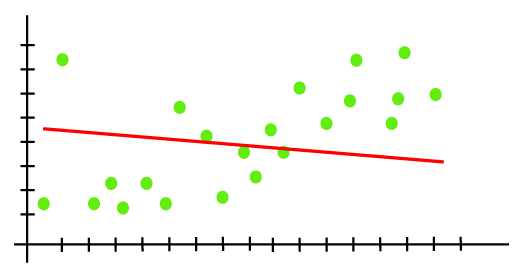


#### So what are the solution for 'Overfitting'?
<ol>
    <li>Cross-Validation</li>
    <li>Training with more data</li>
    <li>Removing features</li>
    <li>Early stopping the training</li>
    <li>Regularization</li>
    <li>Ensembling</li>
</ol><br>

#### Regularization:
Regularization is implemented by adding a “penalty” term to the best fit derived from the trained data, to achieve a lesser variance with the tested data and also restricts the influence of predictor variables over the output variable by compressing their coefficients.
In regularization, what we do is normally we keep the same number of features but reduce the magnitude of the coefficients. We can reduce the magnitude of the coefficients by using different types of regression techniques which uses regularization to overcome this problem.There are three types of regularization as follow:
<ol>
    <li>L1 Regularization</li>
    <li>L2 Regularization</li>
    <li>Dropout Regularization</li>
</ol>

There are two main regularization techniques, namely Ridge Regression and Lasso Regression. They both differ in the way they assign a penalty to the coefficients.Ridge and Lasso regression are some of the simple techniques to reduce model complexity and prevent over-fitting which may result from simple linear regression.

## L1 Regularization:

### Least absolute shrinkage and selection operator regression

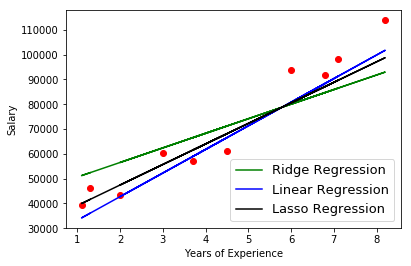

If a regression model uses the L1 Regularization technique, then it is called Lasso Regression. L1 regularization adds a penalty that is equal to the absolute value of the magnitude of the coefficient. This regularization type can result in sparse models with few coefficients. Some coefficients might become zero and get eliminated from the model. Larger penalties result in coefficient values that are closer to zero (ideal for producing simpler models). On the other hand, L2 regularization does not result in any elimination of sparse models or coefficients. Thus, Lasso Regression is easier to interpret as compared to the Ridge.

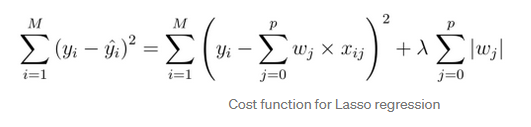

## L2 Regularization:

### Ridge regression

This model solves a regression model where the loss function is the linear least squares function and regularization is given by the l2-norm. Also known as Ridge Regression or Tikhonov regularization. This estimator has built-in support for multi-variate regression.

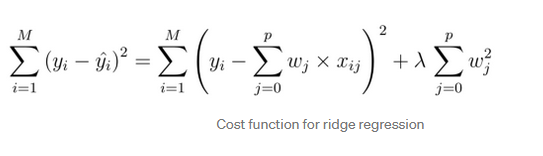

More information: https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

### 1. Importing libraries:

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15, 10)

In [16]:
import warnings
warnings.filterwarnings('ignore')

Dataset being used: https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

In [4]:
df = pd.read_csv("melb_data.csv")
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


### 2. Data Preprocessing and cleaning:

In [5]:
df.nunique()

Suburb             314
Address          13378
Rooms                9
Type                 3
Price             2204
Method               5
SellerG            268
Date                58
Distance           202
Postcode           198
Bedroom2            12
Bathroom             9
Car                 11
Landsize          1448
BuildingArea       602
YearBuilt          144
CouncilArea         33
Lattitude         6503
Longtitude        7063
Regionname           8
Propertycount      311
dtype: int64

In [6]:
df.shape

(13580, 21)

#### Removing unnecessary columns

In [7]:
columns_to_be_used = ['Suburb', 'Rooms', 'Type', 'Price', 'SellerG', 'Method', 'Distance', 'Bedroom2', 'Bathroom',
                     'Car', 'CouncilArea', 'Landsize', 'Propertycount']

df = df[columns_to_be_used]

In [8]:
df.shape

(13580, 13)

In [9]:
df

,Suburb,Rooms,Type,Price,SellerG,Method,Distance,Bedroom2,Bathroom,Car,CouncilArea,Landsize,Propertycount
0,Abbotsford,2,h,1480000.0,Biggin,S,2.5,2.0,1.0,1.0,Yarra,202.0,4019.0
1,Abbotsford,2,h,1035000.0,Biggin,S,2.5,2.0,1.0,0.0,Yarra,156.0,4019.0
2,Abbotsford,3,h,1465000.0,Biggin,SP,2.5,3.0,2.0,0.0,Yarra,134.0,4019.0
3,Abbotsford,3,h,850000.0,Biggin,PI,2.5,3.0,2.0,1.0,Yarra,94.0,4019.0
4,Abbotsford,4,h,1600000.0,Nelson,VB,2.5,3.0,1.0,2.0,Yarra,120.0,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,4,h,1245000.0,Barry,S,16.7,4.0,2.0,2.0,NaN,652.0,7392.0
13576,Williamstown,3,h,1031000.0,Williams,SP,6.8,3.0,2.0,2.0,NaN,333.0,6380.0
13577,Williamstown,3,h,1170000.0,Raine,S,6.8,3.0,2.0,4.0,NaN,436.0,6380.0
13578,Williamstown,4,h,2500000.0,Sweeney,PI,6.8,4.0,1.0,5.0,NaN,866.0,6380.0


#### Checking null values:

In [10]:
df.isna().sum()

Suburb              0
Rooms               0
Type                0
Price               0
SellerG             0
Method              0
Distance            0
Bedroom2            0
Bathroom            0
Car                62
CouncilArea      1369
Landsize            0
Propertycount       0
dtype: int64

Car has NA value means the property has no car parking available.<br>
NOTE: NA value means the that field for that particular row does not have any value not even zero.

In [12]:
columns_to_be_filled_with_zero = ['Car', 'CouncilArea']
df[columns_to_be_filled_with_zero] = df[columns_to_be_filled_with_zero].fillna(0)

In [14]:
df.isna().sum()

Suburb           0
Rooms            0
Type             0
Price            0
SellerG          0
Method           0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
CouncilArea      0
Landsize         0
Propertycount    0
dtype: int64

#### One hot encoding to categorical features:

In [17]:
df = pd.get_dummies(df, drop_first = True)
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,Propertycount,Suburb_Aberfeldie,Suburb_Airport West,...,CouncilArea_Moreland,CouncilArea_Nillumbik,CouncilArea_Port Phillip,CouncilArea_Stonnington,CouncilArea_Unavailable,CouncilArea_Whitehorse,CouncilArea_Whittlesea,CouncilArea_Wyndham,CouncilArea_Yarra,CouncilArea_Yarra Ranges
0,2,1480000.0,2.5,2.0,1.0,1.0,202.0,4019.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,1035000.0,2.5,2.0,1.0,0.0,156.0,4019.0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,3,1465000.0,2.5,3.0,2.0,0.0,134.0,4019.0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,850000.0,2.5,3.0,2.0,1.0,94.0,4019.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,1600000.0,2.5,3.0,1.0,2.0,120.0,4019.0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,4,1245000.0,16.7,4.0,2.0,2.0,652.0,7392.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13576,3,1031000.0,6.8,3.0,2.0,2.0,333.0,6380.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13577,3,1170000.0,6.8,3.0,2.0,4.0,436.0,6380.0,0,0,...,0,0,0,0,0,0,0,0,0,0
13578,4,2500000.0,6.8,4.0,1.0,5.0,866.0,6380.0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Creating x and y vars:

In [21]:
x = df.drop('Price', axis = 1)
y = df['Price']

#### Train-test split:

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2) #30% test 70% training

#### Training the data:

In [24]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)

#### Checking score on test data:

In [25]:
reg.score(x_test, y_test)

-429018125740.54254

In linear regression, score mean R2 and R2 can be negative, basically our model is very bad

In [26]:
reg.score(x_train, y_train)

0.714976969027615

See the difference between score of test data and train data. We have trained our model based on training dataset so it is obvious to have good accuracy but our model perform very very bad on unseen data and this is known as <b>Overfitting</b>. Means our model is performing extremely bad on unseen data.

#### Solution:

#### Using Lasso regression model:

In [27]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [28]:
lasso_reg.score(x_test, y_test)

0.64471107201202

As we can see the accuracy is now imporved.... voilaa!

In [29]:
lasso_reg.score(x_train, y_train)

0.7088552084889502

#### Using Ridge regression model:

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [31]:
ridge_reg.score(x_test, y_test)

0.6225446108332939

In [32]:
ridge_reg.score(x_train, y_train)

0.6706438854210173

#### Now visulaizing the accuracy scores:

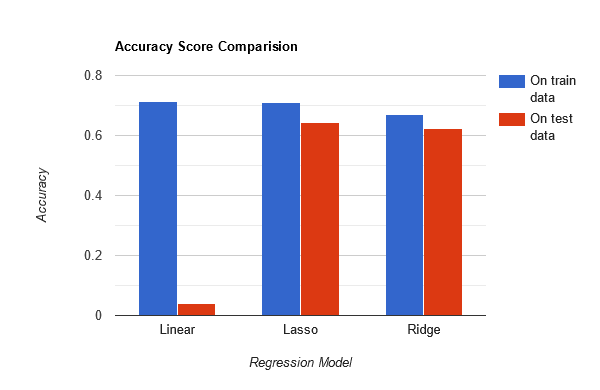

Further Studies: https://www.analyticsvidhya.com/blog/2017/06/a-comprehensive-guide-for-linear-ridge-and-lasso-regression/